### Project Description 


This project aimed to predict Myers-Briggs Type Indicator (MBTI) personality types using a synthetic dataset with various demographic and personality-related features. The dataset included 100K+ samples with features such as age, gender, education, interest areas, and personality scores.

Key steps in the analysis included:
1. **Data Cleaning and Transformation**: Ensured no missing or duplicate values and transformed categorical variables into numerical values using Label Encoding.
2. **Exploratory Data Analysis (EDA)**: Visualized the distribution of features and their relationships with the target variable (Personality).
3. **Model Building**: Built and evaluated multiple machine learning models, including XGBoost, Random Forest, and a Convolutional Neural Network (CNN).


# Personality Types
### The 16 distinct personality types in target column for prediction :

* ISTJ (Introverted, Sensing, Thinking, Judging): The Inspector - Responsible, organized, and practical.

* ISFJ (Introverted, Sensing, Feeling, Judging): The Protector - Compassionate, detail-oriented, and loyal.

* INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.

* INTJ (Introverted, Intuition, Thinking, Judging): The Architect - Strategic, analytical, and independent.

* ISTP (Introverted, Sensing, Thinking, Perceiving): The Virtuoso - Adventurous, logical, and hands-on.

* ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.

* INFP (Introverted, Intuition, Feeling, Perceiving): The Mediator - Creative, empathetic, and idealistic.

* INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.

* ESTP (Extraverted, Sensing, Thinking, Perceiving): The Entrepreneur - Energetic, pragmatic, and action-oriented.

* ESFP (Extraverted, Sensing, Feeling, Perceiving): The Entertainer - Sociable, lively, and spontaneous.

* ENFP (Extraverted, Intuition, Feeling, Perceiving): The Campaigner - Enthusiastic, imaginative, and sociable.

* ENTP (Extraverted, Intuition, Thinking, Perceiving): The Debater - Innovative, energetic, and intellectually curious.

* ESTJ (Extraverted, Sensing, Thinking, Judging): The Executive - Organized, assertive, and pragmatic.

* ESFJ (Extraverted, Sensing, Feeling, Judging): The Consul - Caring, social, and organized.

* ENFJ (Extraverted, Intuition, Feeling, Judging): The Protagonist - Charismatic, empathetic, and organized.

* ENTJ (Extraverted, Intuition, Thinking, Judging): The Commander - Confident, strategic, and decisive.

### Python libraries

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Import python libreries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

Load the dataset

In [3]:
data = pd.read_csv('data.csv')


Overview of the dataset

In [4]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## Data Cleaning & Transformation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


Let's check for the duplicate value

In [6]:
data.duplicated().sum()

0

There is no duplicates values in the dataset

Seeing the above result the dataset does not have missing and duplicate data
so we are doing to move to `exploratory data analysis`

## Exploratory data analysis

In [7]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


Let's start with the age column vs the gender column

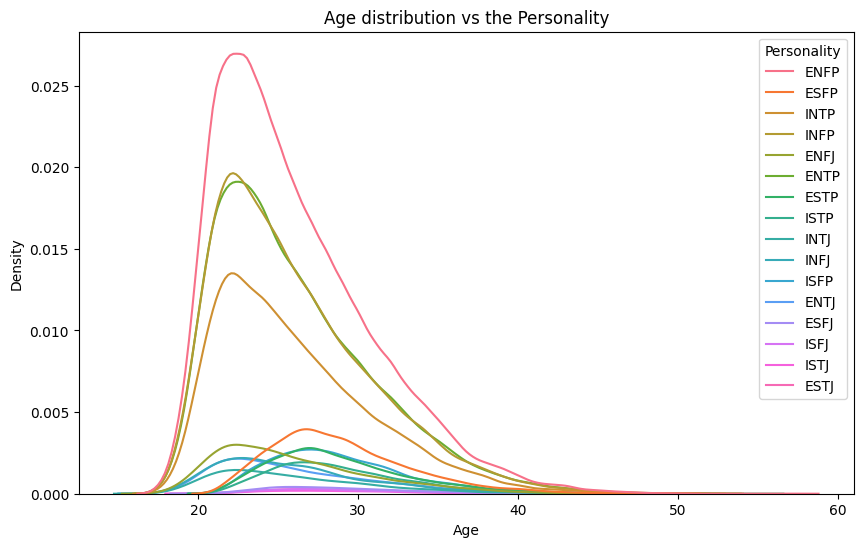

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(data, x='Age',  hue="Personality")
plt.title('Age distribution vs the Personality')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data, x='Age',  hue="Interest")
plt.title('Age distribution vs the interest')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data setup (replace this with your actual data)
data = pd.DataFrame({
    'Personality': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C'],
    'Interest': ['Art', 'Science', 'Art', 'Science', 'Art', 'Science', 'Art', 'Science', 'Art', 'Science'],
    'Introversion Score': [5, 6, 5, 4, 6, 5, 6, 4, 5, 6],
    'Thinking Score': [7, 8, 7, 6, 8, 7, 8, 6, 7, 8],
    'Judging Score': [4, 5, 4, 3, 5, 4, 5, 3, 4, 5]
})

# Group by "Personality" and calculate the mean of the specified columns
Personality = data.groupby(["Personality"])[['Introversion Score', 'Thinking Score', 'Judging Score']].mean()
Person_interest = data.groupby(["Interest"])[['Introversion Score', 'Thinking Score', 'Judging Score']].mean()

# Plot the grouped results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

Personality.plot(kind='bar', ax=ax)
ax.set_title('Mean Scores by Personality')
ax.set_xlabel('Personality')
ax.set_ylabel('Mean Score')

Person_interest.plot(kind='bar', ax=ax)
ax.set_title('Mean Scores by Interest')
ax.set_xlabel('Interest')
ax.set_ylabel('Mean Score')

plt.tight_layout()
plt.show()


             Introversion Score  Thinking Score  Judging Score
Personality                                                   
ENFJ                   7.004616        2.950930       6.397035
ENFP                   7.010038        2.939706       4.373549
ENTJ                   6.971154        7.878246       6.410599
ENTP                   6.968431        7.861365       4.367352
ESFJ                   7.031451        2.803107       6.470169
ESFP                   7.025034        2.952078       4.349461
ESTJ                   7.119486        7.888053       6.420271
ESTP                   6.995538        7.790451       4.363636
INFJ                   2.213627        2.998510       6.417193
INFP                   2.193123        2.973951       4.365246
INTJ                   2.156120        7.957019       6.418576
INTP                   2.155509        7.892129       4.380034
ISFJ                   2.366924        3.003439       6.397540
ISFP                   2.167040        2.971297       4

Personality
ENFP    26.865322
ENTP    19.301739
INFP    19.296273
INTP    13.378000
ESFP     3.773202
ENFJ     3.032149
ISFP     2.698714
ESTP     2.603447
INFJ     2.279382
ENTJ     2.173183
ISTP     1.866298
INTJ     1.499285
ESFJ     0.432606
ESTJ     0.306104
ISFJ     0.289706
ISTJ     0.204590
Name: proportion, dtype: float64


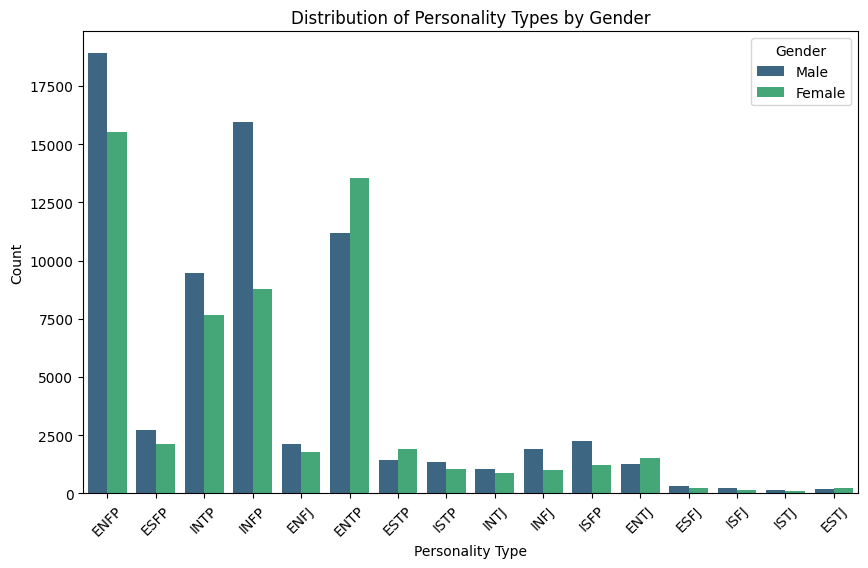

In [10]:
# Calculate the percentage of each personality type
perso = data['Personality'].value_counts(normalize=True) * 100
print(perso)

# Plot the count of personality types, separated by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Personality', hue='Gender', palette='viridis')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.title('Distribution of Personality Types by Gender')
plt.xticks(rotation=45)
plt.show()


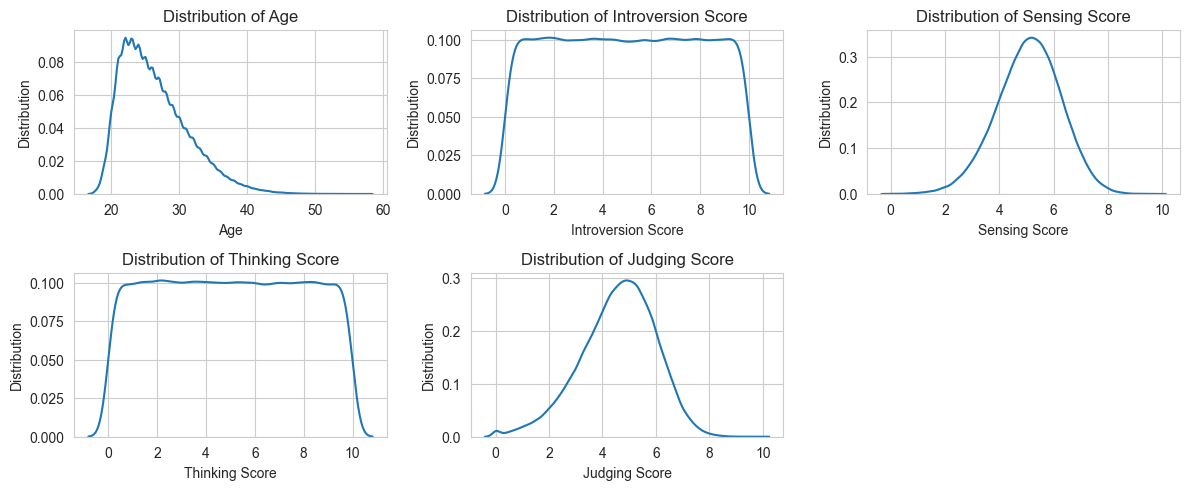

In [11]:
sns.set_style("whitegrid")

numeric = data.select_dtypes('float64','int64')

plt.figure(figsize=(12,7))
for i, column in enumerate(numeric.columns[:],1):
    plt.subplot(3,3,i)
    sns.kdeplot(numeric, x=data[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

Display all the unique containt in each column

In [12]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

Gender
['Male' 'Female']
--------------------------------------------------
Interest
['Unknown' 'Sports' 'Others' 'Technology' 'Arts']
--------------------------------------------------
Personality
['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']
--------------------------------------------------


will replace the target column with numeric values

In [13]:
data.replace({'Personality' : { 'ENFP' : 0, 'ESFP' : 1, 'INTP' : 2,'INFP':3,'ENFJ':4,'ENTP':5,'ESTP':6,'ISTP':7, 'INTJ':8,
                            'INFJ':9,'ISFP':10, 'ENTJ':11,'ESFJ':12,'ISFJ':13,'ISTJ':14,'ESTJ':15 }}, inplace=True)

In [14]:
data['Personality'].value_counts()

Personality
0     34404
5     24718
3     24711
2     17132
1      4832
4      3883
10     3456
6      3334
9      2919
11     2783
7      2390
8      1920
12      554
15      392
13      371
14      262
Name: count, dtype: int64

## Machine Learing model

In [15]:
data.dtypes


Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality             int64
dtype: object

## Create a LabelEncoder instance

Transform all the categorical values to numeric for machine learning model

In [16]:
# Columns to perform label encoding on
columns_to_encode = [ 'Gender', 'Interest']

# Create a LabelEncoder instance
#select features for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()

# Apply label encoding to each column in columns_to_encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the DataFrame after label encoding
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,0
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,1
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,0
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,2
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,0


let's the colrrection of the columns

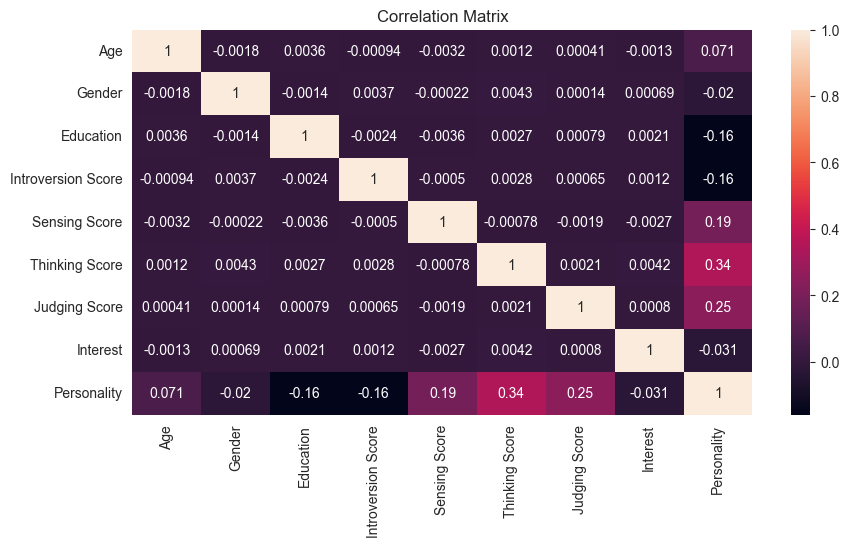

In [17]:
#Correlation metrix

plt.figure(figsize=(10,5))
df= data.corr()
sns.heatmap(df, annot=True)
plt.title("Correlation Matrix")
plt.show()


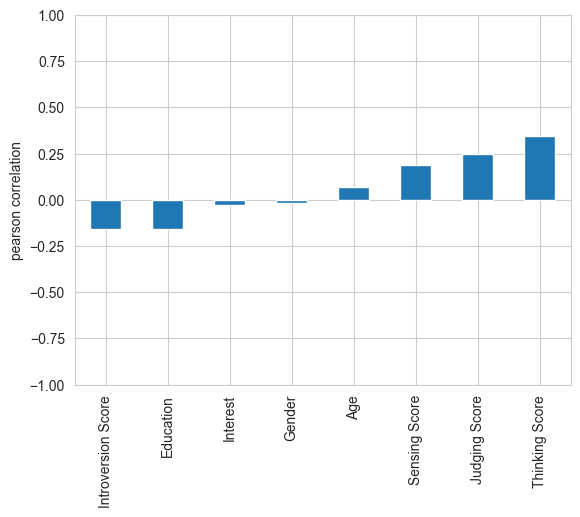

In [18]:
y = (data['Personality']).astype(int)
fields = list(df.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

## Train split the data 

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, precision_score, recall_score


In [20]:
# Features and target
X= data.drop(columns=['Personality'], axis=1)
y = data['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state =42)

We use `StratifiedShuffleSplit` seeing we imbaleced target coloumn, so the above funcion split the dataset in proportion

In [21]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (89642, 8), y_train: (89642,)
Testing dataset shape, X_test: (38419, 8), y_test: (38419,)


Well done with the `StratifiedShuffleSplit` split

# Model Building


# 1. XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn import metrics

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

In [23]:
# make predictions

from sklearn.metrics import mean_absolute_error
print("train Accuracy_scorer : " + str(accuracy_score(y_train, y_train_pred)))
print("test Accuracy_score : " + str(accuracy_score( y_test,y_test_pred)))

train Accuracy_scorer : 0.9599964302447513
test Accuracy_score : 0.8966657122777792


Print out confusion matrix

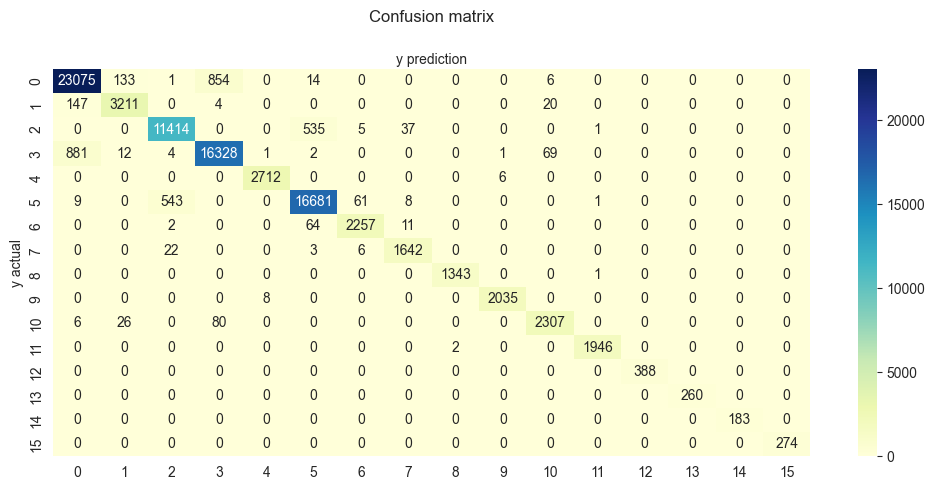

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24083
           1       0.95      0.95      0.95      3382
           2       0.95      0.95      0.95     11992
           3       0.95      0.94      0.94     17298
           4       1.00      1.00      1.00      2718
           5       0.96      0.96      0.96     17303
           6       0.97      0.97      0.97      2334
           7       0.97      0.98      0.97      1673
           8       1.00      1.00      1.00      1344
           9       1.00      1.00      1.00      2043
          10       0.96      0.95      0.96      2419
          11       1.00      1.00      1.00      1948
          12       1.00      1.00      1.00       388
          13       1.00      1.00      1.00       260
          14       1.00      1.00      1.00       183
          15       1.00      1.00      1.00       274

    accuracy                           0.96     89642
   macro avg       0.98   

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_train, y_train_pred))

# 2.Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=0)
rfc = rfc = RandomForestClassifier(n_estimators=50,random_state=42, oob_score=False)
rfc = rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test,)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.8981493531846222


Print out the confusion metrix heatmap

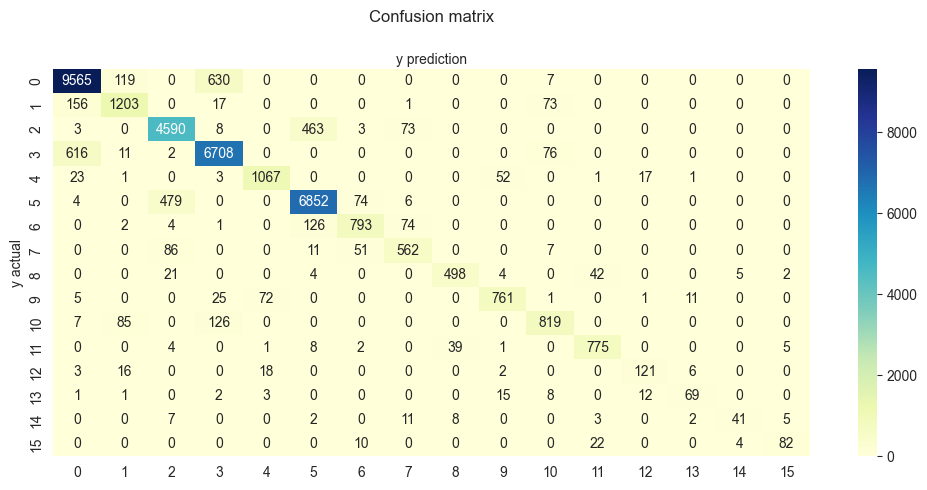

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10321
           1       0.84      0.83      0.83      1450
           2       0.88      0.89      0.89      5140
           3       0.89      0.90      0.90      7413
           4       0.92      0.92      0.92      1165
           5       0.92      0.92      0.92      7415
           6       0.85      0.79      0.82      1000
           7       0.77      0.78      0.78       717
           8       0.91      0.86      0.89       576
           9       0.91      0.87      0.89       876
          10       0.83      0.79      0.81      1037
          11       0.92      0.93      0.92       835
          12       0.80      0.73      0.76       166
          13       0.78      0.62      0.69       111
          14       0.82      0.52      0.64        79
          15       0.87      0.69      0.77       118

    accuracy                           0.90     38419
   macro avg       0.86   

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))

## GridSearsh with Random Forest

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

GR = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)
GR.fit(X_train, y_train)
GR.best_params_

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 37}

In [29]:
pred_gr = GR.predict(X_test)
print('accuracy',metrics.accuracy_score(y_test,pred_gr))
print(metrics.classification_report(y_test, pred_gr))

accuracy 0.9005960592415211
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10321
           1       0.84      0.81      0.83      1450
           2       0.89      0.90      0.89      5140
           3       0.89      0.91      0.90      7413
           4       0.93      0.91      0.92      1165
           5       0.92      0.93      0.92      7415
           6       0.85      0.79      0.82      1000
           7       0.78      0.80      0.79       717
           8       0.93      0.84      0.88       576
           9       0.92      0.86      0.89       876
          10       0.82      0.79      0.81      1037
          11       0.92      0.93      0.93       835
          12       0.81      0.75      0.78       166
          13       0.77      0.59      0.67       111
          14       0.81      0.49      0.61        79
          15       0.88      0.69      0.77       118

    accuracy                           0.90     3841

###  Neural Network

Build a NN model with 2 hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function.

In [30]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2.18.0


In [31]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train, num_classes=16)
y_test_encoded = to_categorical(y_test, num_classes=16)

feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 16
loss_function_used = CategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Dense(48, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(48, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=16, verbose=-1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_encoded, verbose=-1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Test results - Loss: 0.24925853312015533 - Accuracy: 87.83674836158752%


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,522 (45.01 KB)

 Trainable params: 3,840 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,682 (30.01 KB)

Text(0.5, 1.0, 'Accuracy over iterations')

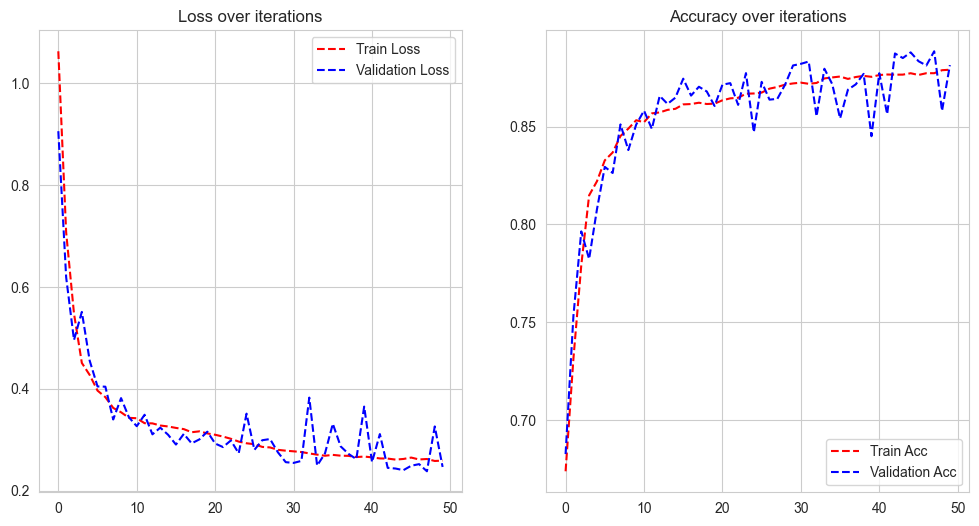

In [33]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r--', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b--', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r--', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b--', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [34]:
y_pred_prob_nn_2 = model.predict(X_test)
y_pred_class_nn_2 = np.argmax(y_pred_prob_nn_2, axis=1)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_2)))
print('')   
print('classification report:', classification_report(y_test, y_pred_class_nn_2))

1201/1201 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

accuracy is 0.878

classification report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91     10321
           1       0.85      0.72      0.78      1450
           2       0.92      0.80      0.86      5140
           3       0.88      0.91      0.89      7413
           4       0.88      0.86      0.87      1165
           5       0.84      0.97      0.90      7415
           6       0.86      0.72      0.78      1000
           7       0.76      0.79      0.78       717
           8       0.89      0.81      0.85       576
           9       0.87      0.89      0.88       876
          10       0.81      0.80      0.80      1037
          11       0.88      0.87      0.87       835
          12       0.90      0.43      0.58       166
          13       0.77      0.67      0.71       111
          14       0.64      0.66      0.65        79
          15       0.82      0.74      0.78    

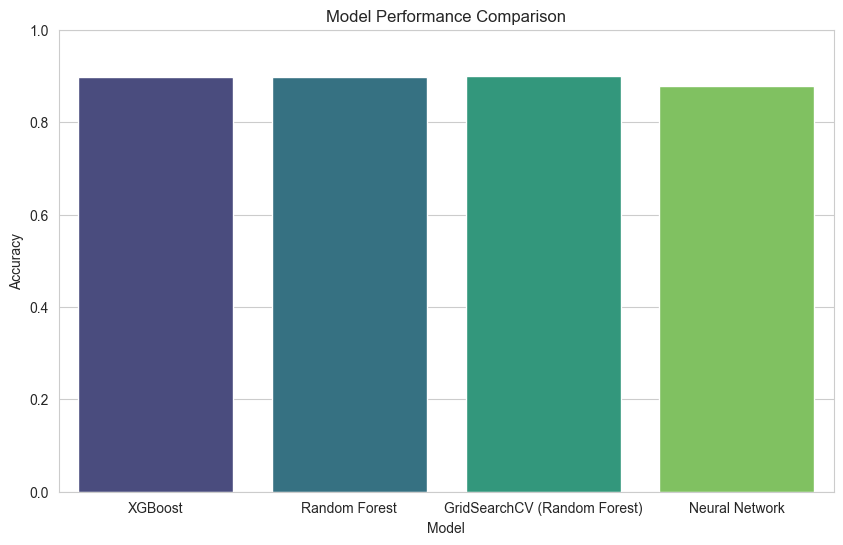

In [35]:
# Model names and their corresponding accuracies
model_names = ['XGBoost', 'Random Forest', 'GridSearchCV (Random Forest)', 'Neural Network']
accuracies = [
    accuracy_score(y_test, y_test_pred),  # XGBoost accuracy
    accuracy_score(y_test, y_pred_rf),    # Random Forest accuracy
    accuracy_score(y_test, pred_gr),      # GridSearchCV (Random Forest) accuracy
    accuracy_score(y_test, y_pred_class_nn_2)  # Neural Network accuracy
]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

#### I will use Gridsearch Model to build a Predictive system base on train data

In [36]:
# will randomly select the array to test our model build
input_data = X_test.iloc[20:21]

# change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are inserting a new value for prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = xgb_clf.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print('ENFP (Extraverted, Intuition, Feeling, Perceiving): The Campaigner - Enthusiastic, imaginative, and sociable')
elif prediction == 1:
    print('ESFP (Extraverted, Sensing, Feeling, Perceiving): The Entertainer - Sociable, lively, and spontaneous.')
elif prediction == 2:
    print('INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.')
elif prediction == 3:
    print('INFP (Introverted, Intuition, Feeling, Perceiving): The Mediator - Creative, empathetic, and idealistic.')
elif prediction == 4:
    print('INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.')
elif prediction == 5:
    print('ENTP (Extraverted, Intuition, Thinking, Perceiving): The Debater - Innovative, energetic, and intellectually curious.')
elif prediction == 6:
    print('ESTP (Extraverted, Sensing, Thinking, Perceiving): The Entrepreneur - Energetic, pragmatic, and action-oriented.')
elif prediction == 7:
    print('ISTP (Introverted, Sensing, Thinking, Perceiving): The Virtuoso - Adventurous, logical, and hands-on.')
elif prediction == 8:
    print('INTJ (Introverted, Intuition, Thinking, Judging): The Architect - Strategic, analytical, and independent.')
elif prediction == 9:
    print('INFJ (Introverted, Intuition, Feeling, Judging): The Advocate - Idealistic, insightful, and principled.')
elif prediction == 10:
    print('ISFP (Introverted, Sensing, Feeling, Perceiving): The Composer - Artistic, gentle, and spontaneous.')
elif prediction == 11:
    print('ENTJ (Extraverted, Intuition, Thinking, Judging): The Commander - Confident, strategic, and decisive.')
elif prediction == 12:
    print('ESFJ (Extraverted, Sensing, Feeling, Judging): The Consul - Caring, social, and organized.')
elif prediction == 13:
    print('ISFJ (Introverted, Sensing, Feeling, Judging): The Protector - Compassionate, detail-oriented, and loyal.')
elif prediction == 14:
    print('ISTJ (Introverted, Sensing, Thinking, Judging): The Inspector - Responsible, organized, and practical.')
else:
    print('ESTJ (Extraverted, Sensing, Thinking, Judging): The Executive - Organized, assertive, and pragmatic.')

print('This statement is correctly executed')


[2]
INTP (Introverted, Intuition, Thinking, Perceiving): The Logician - Curious, analytical, and independent.
This statement is correctly executed


### Thanks for going through this notebook if you like it please upvote 


### Model Performance
The performance of the models was evaluated using accuracy scores. The results are as follows:
- **XGBoost**: Achieved an accuracy of approximately 89.67% on the test set.
- **Random Forest**: Achieved an accuracy of approximately 89.81% on the test set.
- **GridSearchCV (Random Forest)**: Achieved an accuracy of approximately 90.06% on the test set.
- **Neural Network**: Achieved an accuracy of approximately 87.20% on the test set.

### Recommendation
Based on the model performance, the **GridSearchCV (Random Forest)** model is recommended for predicting MBTI personality types. This model achieved the highest accuracy on the test set and demonstrated robust performance.

Further recommendations include:
1. **Feature Engineering**: Explore additional features or interactions between existing features to improve model performance.
2. **Hyperparameter Tuning**: Continue fine-tuning hyperparameters for the selected model to achieve even better accuracy.
3. **Model Ensemble**: Consider combining multiple models (e.g., XGBoost and Random Forest) to create an ensemble model that may improve overall performance.
4. **Cross-Validation**: Implement cross-validation techniques to ensure the model's robustness and generalizability to unseen data.

By following these recommendations, the predictive system can be further enhanced to provide more accurate and reliable predictions of MBTI personality types.